1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm
import seaborn as sb

%matplotlib inline

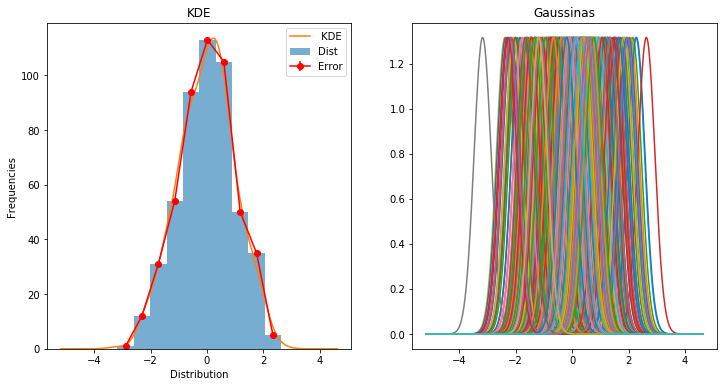

In [37]:
mean = 0
std = 1
N = 500
x = np.random.normal(mean, std, N)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
n_bins = 10
height, edges, bins = ax1.hist(x, bins = n_bins, label='Dist' , alpha=0.6)
ax1.set_ylabel("Frequencies")
ax1.set_xlabel("Distribution")
ax1.set_title('KDE')
ax1.yaxis.set_major_locator(MultipleLocator(N//25))
central_points = 1/2*(edges[1:] + edges[:-1])
ax1.errorbar(central_points, height,1/np.sqrt(height) , marker = 'o', label = "Error", color="red")
ax1.legend()
std_gauss = 1.06 * x.std() * x.size**(-1/5)
pdf = []
for i in x:
    ls = np.linspace(x.min()-2, x.max()+2, N)
    gauss = norm(i, std_gauss)
    pdf.append(gauss.pdf(ls))
    ax2.plot(ls, pdf[-1])
ax2.set_title('Gaussinas')
gauss_norm= np.sum(pdf, axis=0)/N*(sp.integrate.trapz(height, x = edges[1:])) 
ax1.plot(ls, gauss_norm, label=' KDE')
ax1.legend()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2019-07-28 10:05:33--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2019-07-28 10:05:34--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca6de7d869b8a2998a2698b105a.dl.dropboxusercontent.com/cd/0/inline/AlizDsaD_ag346T32Q0ax-nKaFZ2GBrosDuWWiR1CG_PqVBk9GrXeTEjxnQLJdEJbu-4gj9mxbQyPlG5VOaiY_Ih_viTj_5yrOMSEEaL4PqjuQ/file# [following]
--2019-07-28 10:05:34--  https://uca6de7d869b8a2998a2698b105a.dl.dropboxusercontent.com/cd/0/inline/AlizDsaD_ag346T32Q0ax-nKaFZ2GBrosDuWWiR1CG_PqVBk9GrXeTEjxnQLJdEJbu-4gj9mxbQ

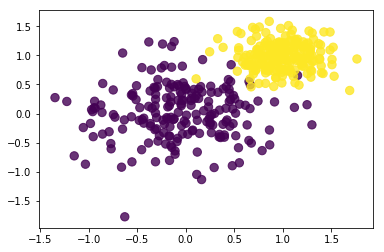

In [9]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


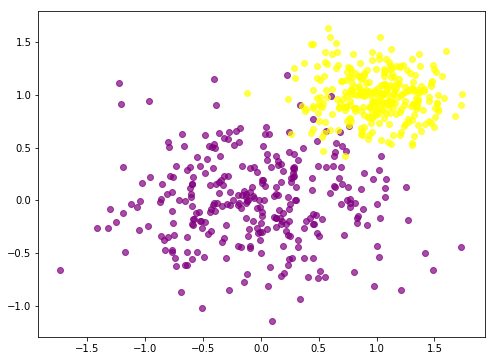

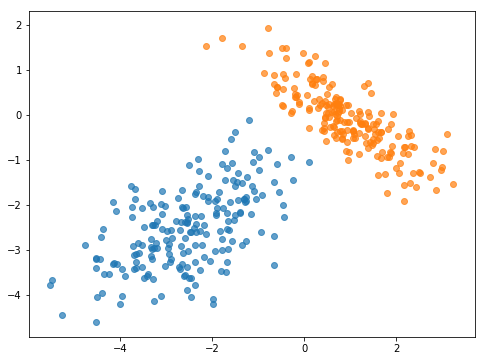

In [59]:
# Create the fist set of data
N = 300
mean = [0, 0]
std = [[0.4, 0], [0, 0.2]]
mean1 = [1, 1]
std1 = [[0.1, 0], [0, 0.04]]
mean2 = [-3,3] 
std2 = [-1,1]
z = np.random.multivariate_normal(mean, std, N)
u = np.random.multivariate_normal(mean1, std1, N)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.scatter(x=z[:,0], y=z[:,1], marker='o', c='purple', alpha = 0.7)
ax.scatter(x=u[:,0], y=u[:,1], marker='o', c='yellow', alpha = 0.7)
fig, ay = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
for i in range(2):
    mean = np.random.uniform(mean2[0], mean2[1], size=2)
    std = np.random.uniform(std2[0], std2[1], size=(2,2))
    std = std.dot(std.T)
    gauss  = np.random.multivariate_normal(mean, std, 200)
    ay.scatter(x=gauss[:,0], y=gauss[:,1], marker='o', alpha = 0.7)
 



3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2019-07-28 09:55:17--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2019-07-28 09:55:18--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca42736d7d8c2606954d5407c9b.dl.dropboxusercontent.com/cd/0/inline/Algx8VdJ5xndydA7mtv421m0s57dhPiaOdVltCJc_9f7PeVvAdANBxArzjvd0SEc15l__QY9RPXXLtnfirWnKCjzJdgFP3wW34MSAGSzHrhg3g/file# [following]
--2019-07-28 09:55:18--  https://uca42736d7d8c2606954d5407c9b.dl.dropboxusercontent.com/cd/0/inline/Algx8VdJ5xndydA7mtv421m0s57dhPiaOdVltCJc_9f7PeVvAdANBxArzjvd0SEc15l__QY9RPXXLtnfirWnKCjzJdgFP3wW34MSAGSzHrhg3g/file
R

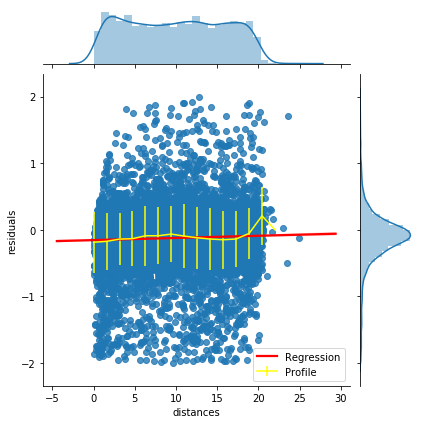

In [61]:
data = pd.DataFrame(np.load('residuals_261.npy').item())
data = data[abs(data['residuals'])< 2]
linregres = sp.stats.linregress(data['distances'], data['residuals'])
sb.jointplot(data['distances'], data['residuals'], kind="reg", line_kws={'color':'red', 'label':'Regression'})
n_bins = 15
x = np.linspace(0,22, n_bins)
y = np.zeros(n_bins)
erry = np.zeros(len(x))
count = 0
prev = x[0]
for i in range(1, len(x)):
    d_tmp = data[data['distances'] < x[i]]
    d_bin = d_tmp[d_tmp['distances'] >= x[i-1]]
    y[i-1] = d_bin['residuals'].mean()
    erry[i-1] = d_bin['residuals'].std()    
plt.errorbar(x, y, erry, color='yellow', label='Profile')
plt.legend()